![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/58563302-42466a80-8201-11e9-9948-b3e9f88a5662.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# Bike store sales

In this class we'll be analyzing sales made on bike stores.

[Follow this data in a Google Spreadsheet](https://docs.google.com/spreadsheets/d/1NOe_UrPx6ULF2C5MvHmZ9ODuw8t9M77Q1Y64gP-7JHA/edit?usp=sharing)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Loading our data:

In [ ]:
!head data/sales_data.csv

In [4]:
sales = pd.read_csv(
    'data/sales_data.csv',
    parse_dates=['Date'])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## The data at a glance:

In [ ]:
sales.head()

In [ ]:
sales.shape

In [ ]:
sales.info()

In [ ]:
sales.describe()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Numerical analysis and visualization

We'll analyze the `Unit_Cost` column:

In [ ]:
sales['Unit_Cost'].describe()

In [ ]:
sales['Unit_Cost'].mean()

In [ ]:
sales['Unit_Cost'].median()

In [ ]:
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6))

In [ ]:
sales['Unit_Cost'].plot(kind='density', figsize=(14,6)) # kde

In [ ]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(sales['Unit_Cost'].mean(), color='red')
ax.axvline(sales['Unit_Cost'].median(), color='green')

In [ ]:
ax = sales['Unit_Cost'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('dollars')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Categorical analysis and visualization

We'll analyze the `Age_Group` column:

In [ ]:
sales.head()

In [ ]:
sales['Age_Group'].value_counts()

In [ ]:
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(5,5))

In [ ]:
ax = sales['Age_Group'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Sales')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Relationship between the columns?

Can we find any significant relationship?

In [ ]:
corr = sales.corr()

corr

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

In [ ]:
sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6,6))

In [ ]:
sales.plot(kind='scatter', x='Revenue', y='Profit', figsize=(6,6))

In [ ]:
ax = sales[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10,6))
ax.set_ylabel('Profit')

In [ ]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']

sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Column wrangling

We can also create new columns or modify existing ones.

### Add and calculate a new `Revenue_per_Age` column

In [13]:
sales['Revenue_per_Age'] = sales['Revenue'] / sales['Customer_Age']

sales['Revenue_per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

In [ ]:
sales['Revenue_per_Age'].plot(kind='density', figsize=(14,6))

In [ ]:
sales['Revenue_per_Age'].plot(kind='hist', figsize=(14,6))

### Add and calculate a new `Calculated_Cost` column

Use this formula

$$ Calculated\_Cost = Order\_Quantity * Unit\_Cost $$

In [5]:
sales['Calculated_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']

sales['Calculated_Cost'].head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

In [6]:
(sales['Calculated_Cost'] != sales['Cost']).sum()

0

We can see the relationship between `Cost` and `Profit` using a scatter plot:

<AxesSubplot:xlabel='Calculated_Cost', ylabel='Profit'>

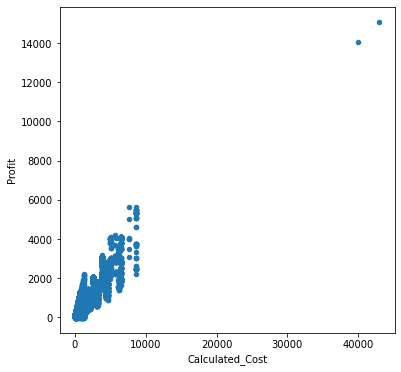

In [7]:
sales.plot(kind='scatter', x='Calculated_Cost', y='Profit', figsize=(6,6))

### Add and calculate a new `Calculated_Revenue` column

Use this formula

$$ Calculated\_Revenue = Cost + Profit $$

In [10]:
sales['Calculated_Revenue'] = sales['Cost'] + sales['Profit']

sales['Calculated_Revenue'].head()

0     950
1     950
2    2401
3    2088
4     418
Name: Calculated_Revenue, dtype: int64

In [11]:
(sales['Calculated_Revenue'] != sales['Revenue']).sum()

0

In [14]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Cost,Calculated_Revenue,Revenue_per_Age
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,360,950,50.000000
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,360,950,50.000000
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,1035,2401,49.000000
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,900,2088,42.612245
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4,45,120,238,180,418,180,418,8.893617


<AxesSubplot:ylabel='Frequency'>

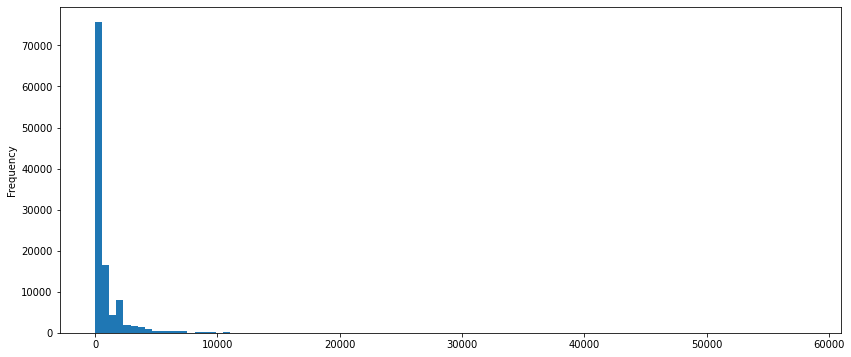

In [15]:
sales['Revenue'].plot(kind='hist', bins=100, figsize=(14,6))

### Modify all `Unit_Price` values adding 3% tax to them

In [16]:
sales['Unit_Price'].head()

0    120
1    120
2    120
3    120
4    120
Name: Unit_Price, dtype: int64

In [17]:
#sales['Unit_Price'] = sales['Unit_Price'] * 1.03

sales['Unit_Price'] *= 1.03

In [23]:
sales['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Selection & Indexing:

### Get all the sales made in the state of `Kentucky`

In [24]:
sales.loc[sales['State'] == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Cost,Calculated_Revenue,Revenue_per_Age
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,45,108,2.700
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,45,108,2.700
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,12,8,22.66,142,96,238,96,238,5.950
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,14,8,22.66,165,112,277,112,277,6.925
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",29,13,36.05,537,377,914,377,914,22.850
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",31,13,36.05,574,403,977,403,977,24.425
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,2,11,30.90,32,22,54,22,54,1.350
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,21,11,30.90,336,231,567,231,567,14.175
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,1,11,30.90,16,11,27,11,27,0.675
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,18,11,30.90,288,198,486,198,486,12.150


### Get the mean revenue of the `Adults (35-64)` sales group

In [25]:
sales.loc[sales['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

### How many records belong to Age Group `Youth (<25)` or `Adults (35-64)`?

In [26]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape[0]

73652

### Get the mean revenue of the sales group `Adults (35-64)` in `United States`

In [27]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)') & (sales['Country'] == 'United States'), 'Revenue'].mean()

726.7260473588342

### Increase the revenue by 10% to every sale made in France

In [28]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     787
51     787
52    2957
53    2851
60     626
Name: Revenue, dtype: int64

In [29]:
#sales.loc[sales['Country'] == 'France', 'Revenue'] = sales.loc[sales['Country'] == 'France', 'Revenue'] * 1.1

sales.loc[sales['Country'] == 'France', 'Revenue'] *= 1.1

In [30]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     865.7
51     865.7
52    3252.7
53    3136.1
60     688.6
Name: Revenue, dtype: float64

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)